In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col

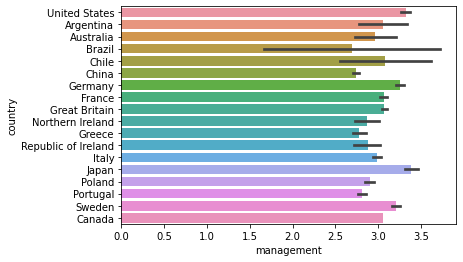

In [26]:
path_to_data ='https://raw.githubusercontent.com/armoutihansen/EEMP2020/main/datasets/AMP_Data.csv'
df = pd.read_csv(path_to_data)
df.describe()
sns.barplot(y='country', x='management', data=df)


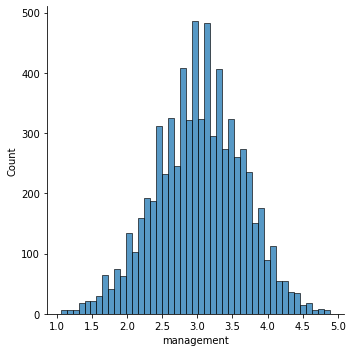

In [3]:
sns.displot(df.management)
##sns.relplot(x='management', y='roce', data=df)

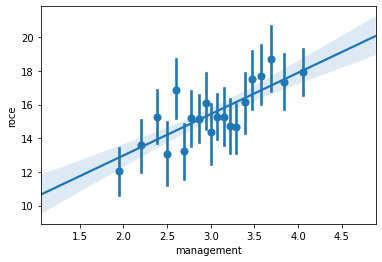

In [31]:
sns.regplot(x='management', y='roce', data=df, x_bins=20)

In [11]:
reg=smf.ols('roce ~ management', data=df).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     68.43
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.56e-16
Time:                        08:48:40   Log-Likelihood:                -29473.
No. Observations:                7094   AIC:                         5.895e+04
Df Residuals:                    7092   BIC:                         5.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0676      0.917      8.796      0.0

In [12]:
from statsmodels.iolib.summary2 import summary_col

print(summary_col(reg, stars=True))


              roce  
--------------------
Intercept  8.0676***
           (0.9172) 
management 2.4547***
           (0.2967) 
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


In [28]:
df['ChinaD']= (df.country=='China')

dfn=df[(df.country=='China') | (df.country=='Great Britain')]
##dfn=df[df.country.isin(["China", "Great Britain"])]


reg2=smf.ols('roce ~ management * ChinaD', data=dfn).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.283
Date:                Tue, 10 Nov 2020   Prob (F-statistic):            0.00505
Time:                        10:19:20   Log-Likelihood:                -9266.6
No. Observations:                2203   AIC:                         1.854e+04
Df Residuals:                    2199   BIC:                         1.856e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [33]:
reg2=smf.ols('roce ~ management', data=df[df.country=='China']).fit()
print(reg2.summary())
reg2=smf.ols('roce ~ management', data=df[df.country=='Great Britain']).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.146
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.285
Time:                        10:37:37   Log-Likelihood:                -2434.9
No. Observations:                 575   AIC:                             4874.
Df Residuals:                     573   BIC:                             4882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4996      4.420      4.638      0.0

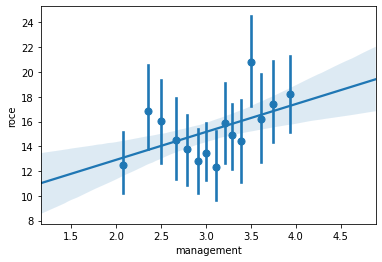

In [49]:
## Reg Plot only for GB
sns.regplot(x='management', y='roce',data=df[df.country=='Great Britain'], x_bins=15 )

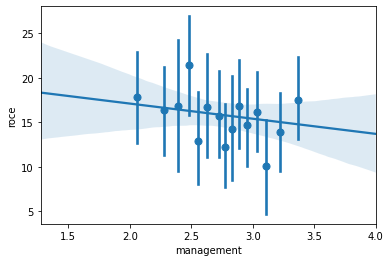

In [50]:
## Reg Plot only for China
sns.regplot(x='management', y='roce',data=df[df.country=='China'], x_bins=15 )

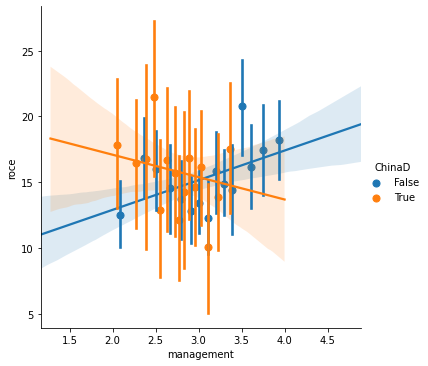

In [47]:
## Both combined
sns.lmplot(x='management', y='roce', hue='ChinaD',data=dfn, x_bins=15 )